##  <p align="center"> National & International Economic Insight & EDA Project </p>

<p align="center"> Cohort-A Econ | End-of-Phase Team Project </p>

# 📘 Data Dictionary: us_econ.csv

| Column Name                                   | Description                                                                 |
|-----------------------------------------------|-----------------------------------------------------------------------------|
| `DATE`                                        | Monthly timestamp (2007–2025)                                               |
| `YEAR`                                        | Calendar year extracted from DATE                                           |
| `MONTH`                                       | Calendar month as a number (1–12)                                           |
| `MONTH_NAME`                                  | Calendar month as text (e.g., Jan, Feb)                                     |
| `QUARTER`                                     | Fiscal quarter for each date (e.g., Q1, Q2)                                 |
| `QUARTER_LABEL`                               | Label combining quarter and year (e.g., Q1 - 2007)                          |
| `Disposable_Personal_Income_Nominal`          | Total post-tax income (billions, current dollars, not inflation-adjusted)  |
| `Disposable_Personal_Income_Per_Capita`       | Post-tax income per person (chained 2017 dollars)                           |
| `Real_Personal_Consumption_Expenditures`      | Inflation-adjusted consumer spending (billions, chained 2017 dollars)       |
| `Total_Personal_Income`                       | Total pre-tax personal income (billions of dollars)                         |
| `RPCE_rolling`                                | 6-month rolling average of real consumption (created in notebook)          |
| `Spending_Efficiency`                         | Ratio of real spending to income (RPCE ÷ DPI)                              |


# 📊 Analytical Questions We’ll Explore

## Intro	Show broad trends in consumption behavior	
1. 📈 How has Real Personal Consumption Expenditures changed over time?
2. 📉 How evenly is spending distributed? Are there spikes or slumps in the data?
## Tension	Compare variables to spot stress or correlation
3. 🔁 Does higher income always lead to higher real consumption?
## Climax	Surface seasonal/cyclical or behavioral anomalies	
4. 📦 Do spending habits show seasonal or quarterly patterns?
5. 📊 How has the ratio of spending to income changed over time?
## Conclusion	Test resilience during crisis / extract insight	Composite analysis
6. 🧯 Did consumption collapse or persist during major recessions?
7. 📘 What does this tell us about U.S. economic behavior and resilience?

In [69]:
# Import Exploratory Libraries
import pandas as pd # for data manipulation using DataFrames
import numpy as np # for numerical operations
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
import matplotlib.ticker as xlocator # for axis formatting customizing axis tick locations and formatting in matplotlib plots
import plotly.express as px # for interactive plots  (especially scatter, line, and map plots)
from scipy.stats import pearsonr # for calculating the Pearson correlation coefficient between two datasets   
from scipy.stats import zscore    
import math # for mathematical operations not found in numpy or native python mathematical functions like log, sqrt, floor, ceil, et
import geopandas as gpd # For working with geospatial data in pandas-like DataFrames
import geoplot.crs as gcrs  # Coordinate reference systems used with geoplot for geospatial plotting
import geoplot as gplt # High-level geospatial plotting built on top of geopandas and matplotlib
import cartopy.crs as ccrs #For advanced cartographic projections and coordinate transformations
from pypalettes import add_cmap # Allows custom color maps for plotting (useful for themed or branded maps)
from pyfonts import load_google_font # To import and use Google Fonts in matplotlib visualizations
#import unicodedata #for normalizing or inspecting Unicode text data (e.g., removing accents or categorizing characters)
import matplotlib.pyplot as plt
plt.style.use("default")  # Restores the light theme
import warnings
warnings.filterwarnings("ignore")


In [70]:
# import US Macro/Micro Index data csv
us_econ = pd.read_csv("../data/US_macro_micro_index.csv")

In [71]:
# unfiltered data 
us_econ

,Unnamed: 0,DATE,YEAR,MONTH,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
0,0,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1
1,1,2007-02-01,2007,2,Feb,Q1,10265.8,39906,11178.2,11734.2
2,2,2007-03-01,2007,3,Mar,Q1,10337.0,40007,11190.7,11821.4
3,3,2007-04-01,2007,4,Apr,Q2,10376.5,40037,11201.5,11868.1
4,4,2007-05-01,2007,5,May,Q2,10412.7,40029,11218.0,11908.7
...,...,...,...,...,...,...,...,...,...,...
214,214,2024-11-01,2024,11,Nov,Q4,21883.6,51565,16267.2,24993.2
215,215,2024-12-01,2024,12,Dec,Q4,21965.2,51581,16357.7,25080.6
216,216,2025-01-01,2025,1,Jan,Q1,22083.8,51648,16296.2,25232.8
217,217,2025-02-01,2025,2,Feb,Q1,22259.7,51809,16313.2,25420.9


In [72]:
# first 5 rows of data
us_econ.head()

,Unnamed: 0,DATE,YEAR,MONTH,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
0,0,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1
1,1,2007-02-01,2007,2,Feb,Q1,10265.8,39906,11178.2,11734.2
2,2,2007-03-01,2007,3,Mar,Q1,10337.0,40007,11190.7,11821.4
3,3,2007-04-01,2007,4,Apr,Q2,10376.5,40037,11201.5,11868.1
4,4,2007-05-01,2007,5,May,Q2,10412.7,40029,11218.0,11908.7


In [73]:
# last 5 rows of data
us_econ.tail()

,Unnamed: 0,DATE,YEAR,MONTH,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
214,214,2024-11-01,2024,11,Nov,Q4,21883.6,51565,16267.2,24993.2
215,215,2024-12-01,2024,12,Dec,Q4,21965.2,51581,16357.7,25080.6
216,216,2025-01-01,2025,1,Jan,Q1,22083.8,51648,16296.2,25232.8
217,217,2025-02-01,2025,2,Feb,Q1,22259.7,51809,16313.2,25420.9
218,218,2025-03-01,2025,3,Mar,Q1,22361.7,52047,16427.3,25537.8


In [74]:
# number of rows and columns
us_econ.shape

(219, 10)

In [75]:
# describe numberic columns
us_econ.describe()

,Unnamed: 0,YEAR,MONTH,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,109.000000,2015.630137,6.438356,14772.744749,44706.808219,13050.686301,16795.313699
std,63.364028,5.281542,3.477264,3505.535636,4349.818062,1622.176393,4090.909736
min,0.000000,2007.000000,1.000000,10200.400000,39579.000000,11068.000000,11647.100000
25%,54.500000,2011.000000,3.000000,11917.350000,40812.500000,11538.800000,13388.050000
50%,109.000000,2016.000000,6.000000,13773.800000,43487.000000,12777.300000,15695.900000
75%,163.500000,2020.000000,9.000000,17577.750000,48418.500000,14073.000000,19812.400000
max,218.000000,2025.000000,12.000000,22361.700000,61570.000000,16427.300000,25537.800000


In [76]:
# field mappings
us_econ.columns


Index(['Unnamed: 0', 'DATE', 'YEAR', 'MONTH', 'MONTH_NAME', 'QUARTER',
       'Disposable_Personal_Income_Nominal',
       'Disposable_Personal_Income_Per_Capita',
       'Real_Personal_Consumption_Expenditures', 'Total_Personal_Income'],
      dtype='object')

In [77]:
us_econ.isnull().sum()


Unnamed: 0                                0
DATE                                      0
YEAR                                      0
MONTH                                     0
MONTH_NAME                                0
QUARTER                                   0
Disposable_Personal_Income_Nominal        0
Disposable_Personal_Income_Per_Capita     0
Real_Personal_Consumption_Expenditures    0
Total_Personal_Income                     0
dtype: int64

In [78]:
# Check for fully empty rows
us_econ[us_econ.isnull().all(axis=1)]

,Unnamed: 0,DATE,YEAR,MONTH,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income


In [79]:
# Check for duplicate rows
us_econ.duplicated().sum()

np.int64(0)

In [80]:
us_econ.drop(columns=["Unnamed: 0"], inplace=True)

In [81]:
us_econ

,DATE,YEAR,MONTH,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
0,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1
1,2007-02-01,2007,2,Feb,Q1,10265.8,39906,11178.2,11734.2
2,2007-03-01,2007,3,Mar,Q1,10337.0,40007,11190.7,11821.4
3,2007-04-01,2007,4,Apr,Q2,10376.5,40037,11201.5,11868.1
4,2007-05-01,2007,5,May,Q2,10412.7,40029,11218.0,11908.7
...,...,...,...,...,...,...,...,...,...
214,2024-11-01,2024,11,Nov,Q4,21883.6,51565,16267.2,24993.2
215,2024-12-01,2024,12,Dec,Q4,21965.2,51581,16357.7,25080.6
216,2025-01-01,2025,1,Jan,Q1,22083.8,51648,16296.2,25232.8
217,2025-02-01,2025,2,Feb,Q1,22259.7,51809,16313.2,25420.9


In [82]:
us_econ.dtypes

DATE                                       object
YEAR                                        int64
MONTH                                       int64
MONTH_NAME                                 object
QUARTER                                    object
Disposable_Personal_Income_Nominal        float64
Disposable_Personal_Income_Per_Capita       int64
Real_Personal_Consumption_Expenditures    float64
Total_Personal_Income                     float64
dtype: object

In [83]:
us_econ.info


<bound method DataFrame.info of            DATE  YEAR  MONTH MONTH_NAME QUARTER  \
0    2007-01-01  2007      1        Jan      Q1   
1    2007-02-01  2007      2        Feb      Q1   
2    2007-03-01  2007      3        Mar      Q1   
3    2007-04-01  2007      4        Apr      Q2   
4    2007-05-01  2007      5        May      Q2   
..          ...   ...    ...        ...     ...   
214  2024-11-01  2024     11        Nov      Q4   
215  2024-12-01  2024     12        Dec      Q4   
216  2025-01-01  2025      1        Jan      Q1   
217  2025-02-01  2025      2        Feb      Q1   
218  2025-03-01  2025      3        Mar      Q1   

     Disposable_Personal_Income_Nominal  \
0                               10200.4   
1                               10265.8   
2                               10337.0   
3                               10376.5   
4                               10412.7   
..                                  ...   
214                             21883.6   
215        

In [84]:
us_econ.describe()

,YEAR,MONTH,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2015.630137,6.438356,14772.744749,44706.808219,13050.686301,16795.313699
std,5.281542,3.477264,3505.535636,4349.818062,1622.176393,4090.909736
min,2007.000000,1.000000,10200.400000,39579.000000,11068.000000,11647.100000
25%,2011.000000,3.000000,11917.350000,40812.500000,11538.800000,13388.050000
50%,2016.000000,6.000000,13773.800000,43487.000000,12777.300000,15695.900000
75%,2020.000000,9.000000,17577.750000,48418.500000,14073.000000,19812.400000
max,2025.000000,12.000000,22361.700000,61570.000000,16427.300000,25537.800000


## 📖 Story Chapter: Introduction (Macro)
We begin with broad national trends in consumer spending (RPCE). This phase sets the stage for understanding the economy’s behavior over time by establishing foundational patterns — what’s happening with income and spending on a broad level before digging into when, how, or why things shift.

## ❓ Question 1: How has Real Personal Consumption Expenditures changed over time?
Chart Class: Univariate

Chart Type: Line Chart (with 6-Month Rolling Average)

Purpose: Show long-term consumption trends and highlight behavior around recessions.

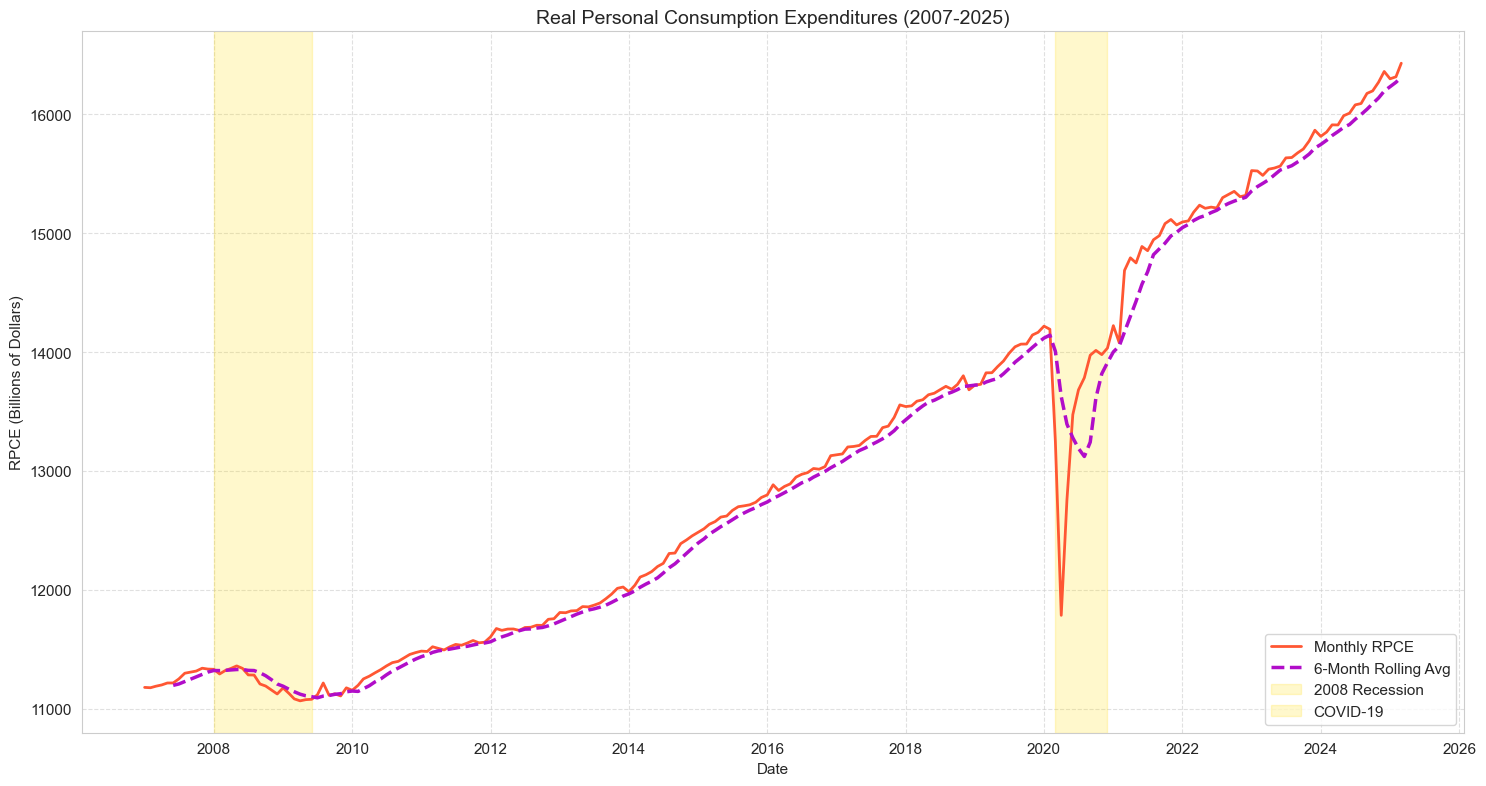

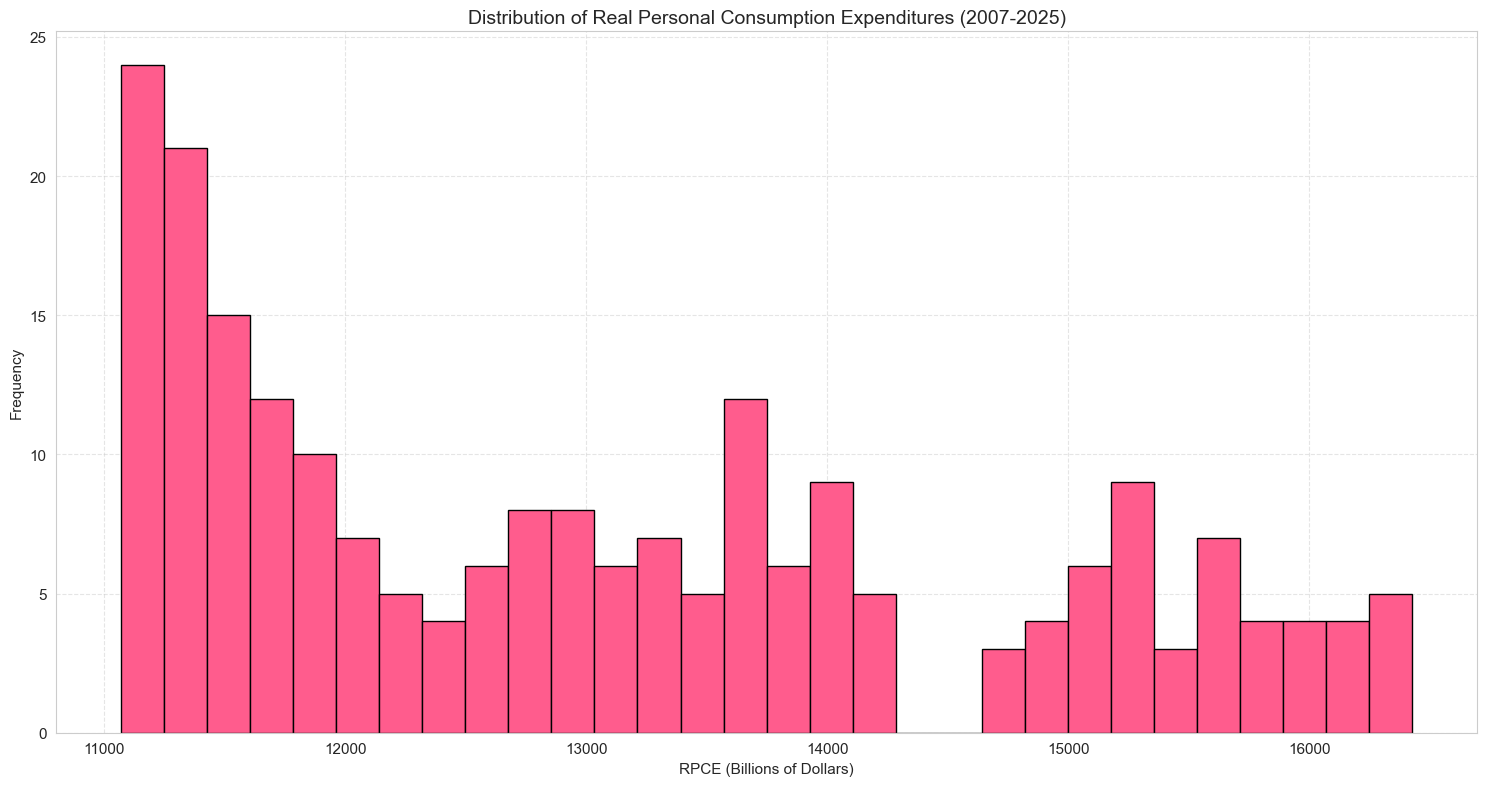

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Reload the dataset and prepare columns
us_econ = pd.read_csv("../data/US_macro_micro_index.csv")
us_econ['DATE'] = pd.to_datetime(us_econ['DATE'])
us_econ['RPCE_rolling'] = us_econ['Real_Personal_Consumption_Expenditures'].rolling(6).mean()

# Chart 1 (Combined version of previous 1A and 1B with recession bands)
plt.figure(figsize=(15, 8))
plt.plot(us_econ['DATE'], us_econ['Real_Personal_Consumption_Expenditures'],
         color='#FF5733', linewidth=2, label='Monthly RPCE')
plt.plot(us_econ['DATE'], us_econ['RPCE_rolling'],
         color='#B10DC9', linewidth=2.5, linestyle='--', label='6-Month Rolling Avg')
plt.axvspan(pd.to_datetime('2008-01-01'), pd.to_datetime('2009-06-01'),
            color='#FFDC00', alpha=0.2, label='2008 Recession')
plt.axvspan(pd.to_datetime('2020-03-01'), pd.to_datetime('2020-12-01'),
            color='#FFDC00', alpha=0.2, label='COVID-19')
plt.title('Real Personal Consumption Expenditures (2007-2025)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('RPCE (Billions of Dollars)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Histogram of RPCE
plt.figure(figsize=(15, 8))
plt.hist(us_econ['Real_Personal_Consumption_Expenditures'],
         bins=30, color='#FF5C8D', edgecolor='black')
plt.title('Distribution of Real Personal Consumption Expenditures (2007-2025)', fontsize=14)
plt.xlabel('RPCE (Billions of Dollars)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



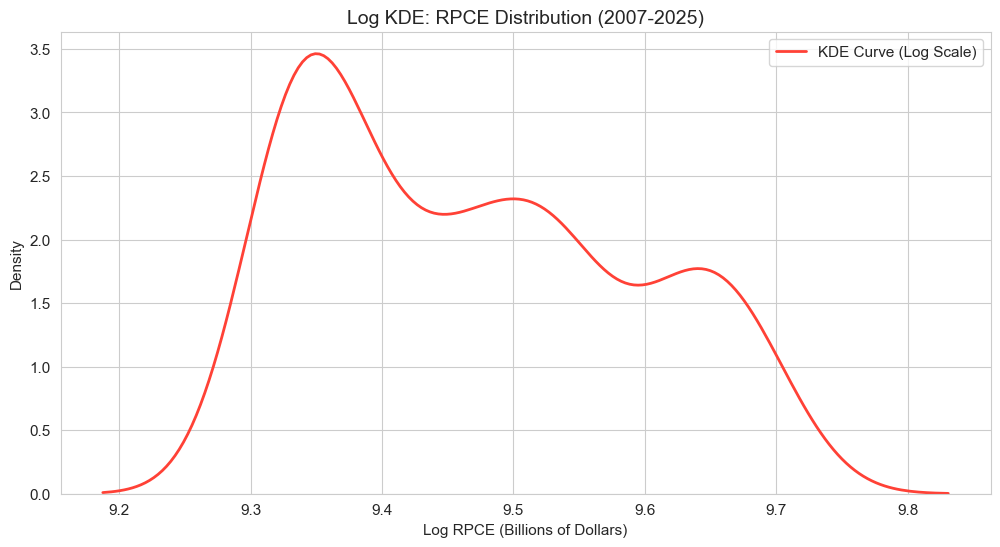

In [124]:
rpce = us_econ['Real_Personal_Consumption_Expenditures']
rpce_clean = rpce.dropna()
rpce_log = np.log(rpce_clean[rpce_clean > 0])

plt.figure(figsize=(12, 6))
sns.kdeplot(rpce_log, color='#FF4136', linewidth=2, label='KDE Curve (Log Scale)')
plt.title('Log KDE: RPCE Distribution (2007-2025)', fontsize=14)
plt.xlabel('Log RPCE (Billions of Dollars)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

## ❓ Question 2: Does higher disposable income always lead to higher real consumption?


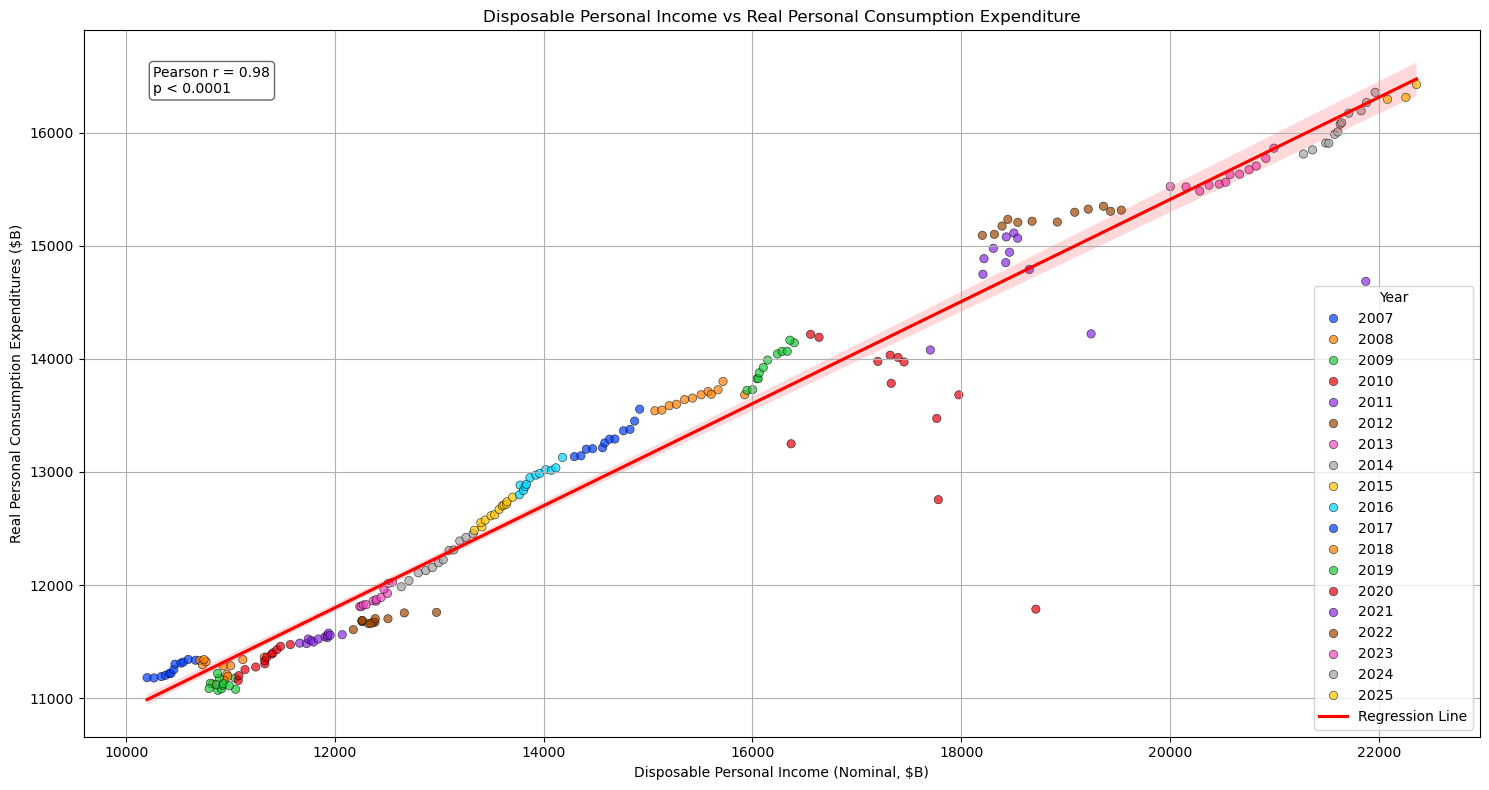

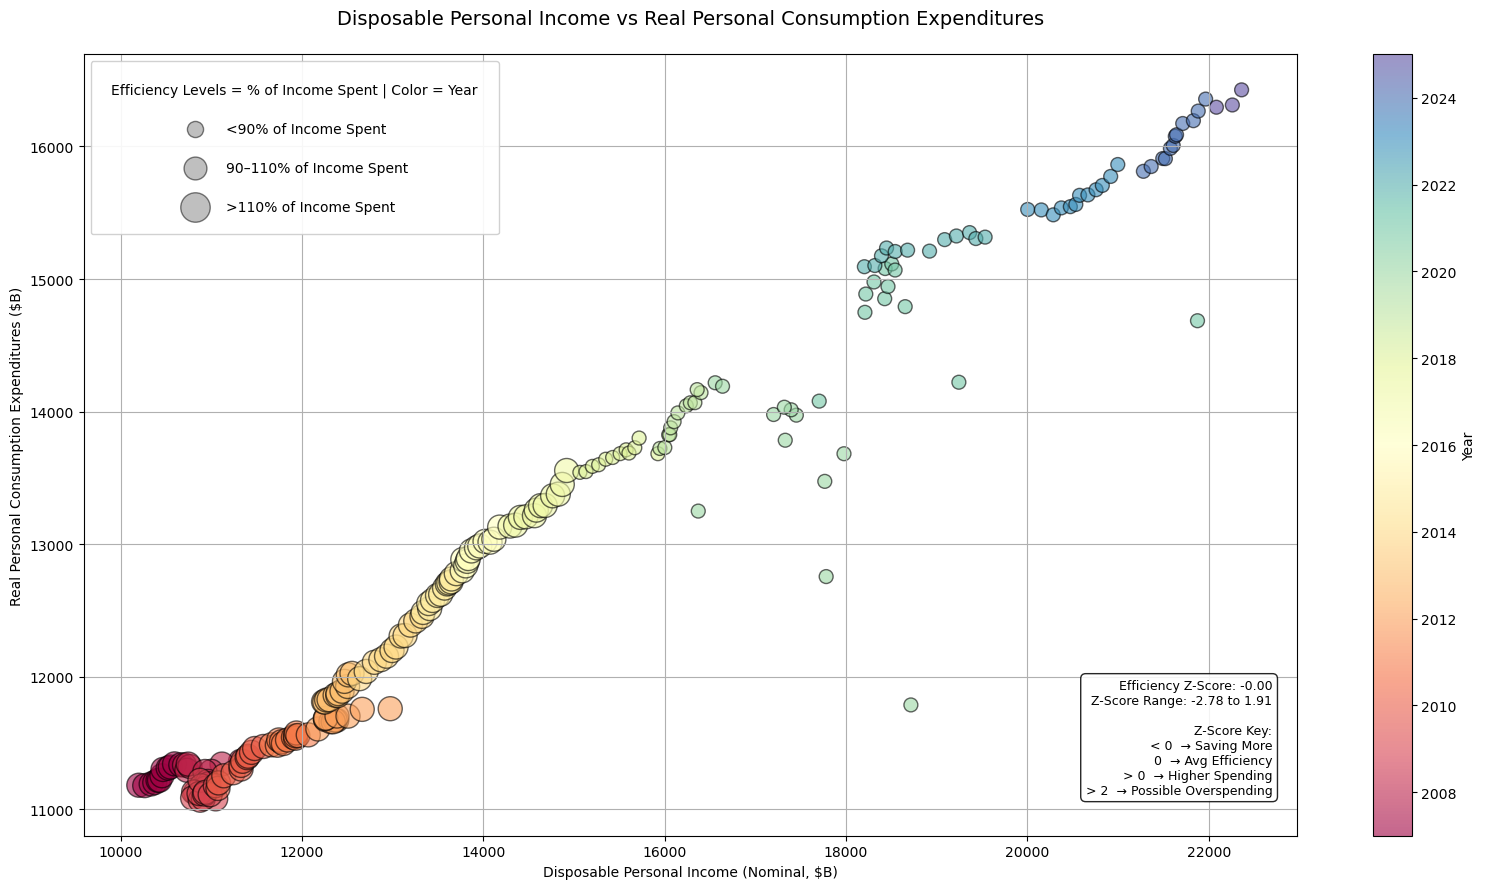

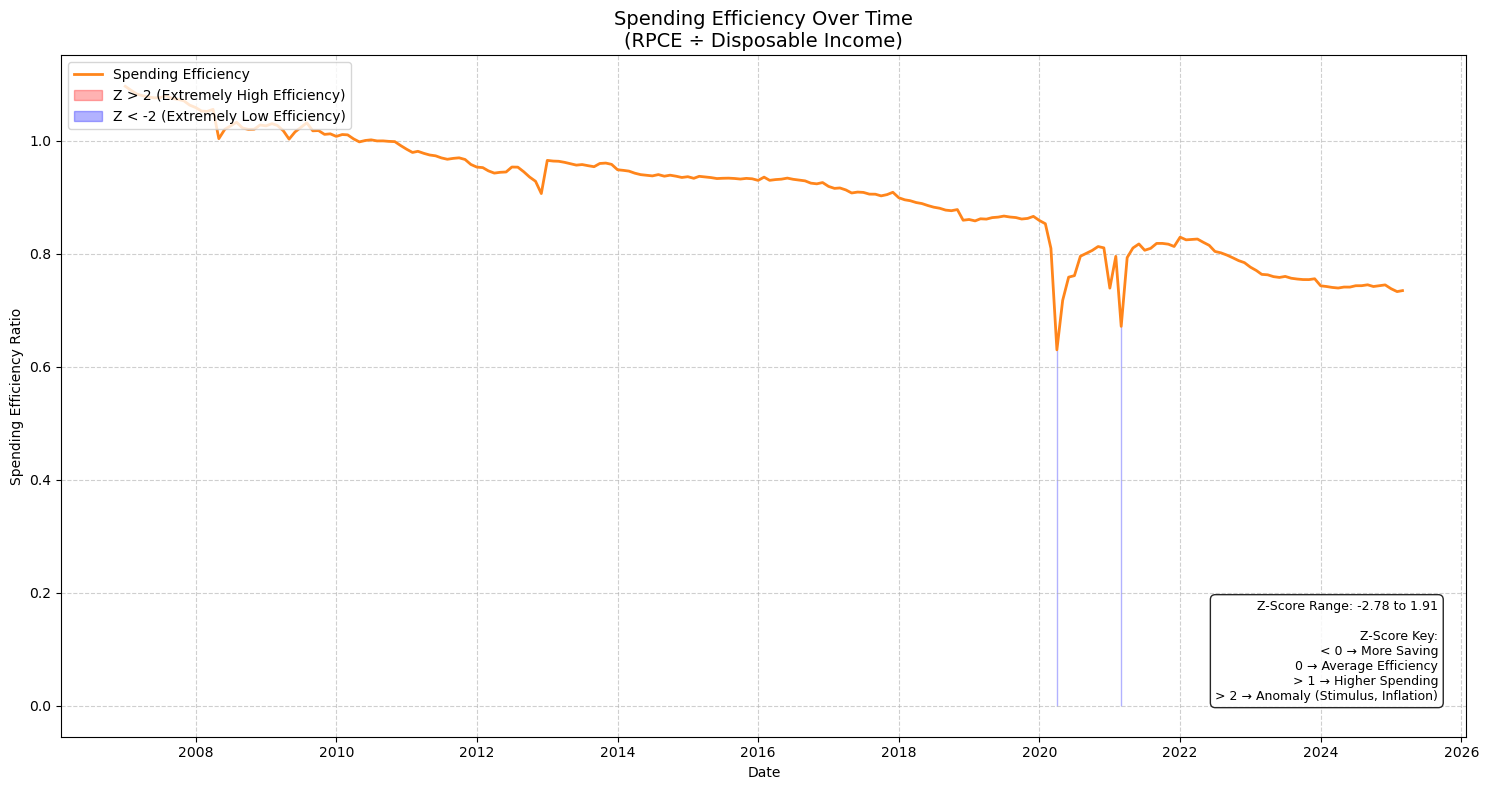

In [86]:
# Relationship Between Income and RPCE (Spending) to Examine correlation and efficiency of spending relative to income - Measures strength of correlation between income and consumption
# Chart Class: Bivariate → Multivariate

# Disposable Income with Regression Line 
fig, ax1 = plt.subplots(figsize=(15, 8))

sns.scatterplot(
    data=us_econ,
    x='Disposable_Personal_Income_Nominal',
    y='Real_Personal_Consumption_Expenditures',
    hue='YEAR',
    palette='bright',
    edgecolor='black',
    alpha=0.7,
    ax=ax1
)

sns.regplot(
    data=us_econ,
    x='Disposable_Personal_Income_Nominal',
    y='Real_Personal_Consumption_Expenditures',
    scatter=False,
    color='red',
    ax=ax1,
    label='Regression Line'
)

# Annotate correlation results
text = f"Pearson r = 0.98\np < 0.0001"
ax1.text(0.05, 0.95, text, transform=ax1.transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.6))

ax1.set_title("Disposable Personal Income vs Real Personal Consumption Expenditure")
ax1.set_xlabel("Disposable Personal Income (Nominal, $B)")
ax1.set_ylabel("Real Personal Consumption Expenditures ($B)")
ax1.legend(title='Year')
ax1.grid(True)
plt.tight_layout()
plt.show()


# Spending efficiency and Z-score
us_econ['Spending_Efficiency'] = us_econ['Real_Personal_Consumption_Expenditures'] / us_econ['Disposable_Personal_Income_Nominal']
us_econ['Efficiency_Z'] = zscore(us_econ['Spending_Efficiency'])

# Categorize spending efficiency for bubble sizes
def categorize_eff(val):
    if val < 0.9:
        return 'Low (<90% Spent)'
    elif 0.9 <= val <= 1.1:
        return 'Medium (90–110% Spent)'
    else:
        return 'High (>110% Spent)'
us_econ['Efficiency_Category'] = us_econ['Spending_Efficiency'].apply(categorize_eff)

size_map = {
    'Low (<90% Spent)': 100,
    'Medium (90–110% Spent)': 300,
    'High (>110% Spent)': 600
}
us_econ['Bubble_Size'] = us_econ['Efficiency_Category'].map(size_map)

# Chart
fig, ax = plt.subplots(figsize=(16.2, 9))
bubble = ax.scatter(
    us_econ['Disposable_Personal_Income_Nominal'],
    us_econ['Real_Personal_Consumption_Expenditures'],
    s=us_econ['Bubble_Size'],
    c=us_econ['YEAR'],
    cmap='Spectral',
    alpha=0.6,
    edgecolor='black'
)

# Colorbar for year
cbar = plt.colorbar(bubble, ax=ax)
cbar.set_label("Year")

# Bubble size legend (Top Left – smaller bubbles, cleaner layout)
handles = [
    plt.scatter([], [], s=60, color='gray', alpha=0.5, edgecolor='black'),
    plt.scatter([], [], s=120, color='gray', alpha=0.5, edgecolor='black'),
    plt.scatter([], [], s=200, color='gray', alpha=0.5, edgecolor='black')
]
labels = [
    '<90% of Income Spent',
    '90–110% of Income Spent',
    '>110% of Income Spent'
]

legend = ax.legend(
    handles=handles,
    labels=labels,
    title="Efficiency Levels = % of Income Spent | Color = Year",
    loc='upper left',
    frameon=True,
    markerscale=1.5,
    labelspacing=1.8,
    borderpad=1.5,
    handletextpad=1.2
)
legend.get_frame().set_alpha(0.9)


# Z-score box (Bottom Right)
z_text = (
    f"Efficiency Z-Score: {us_econ['Efficiency_Z'].mean():.2f}\n"
    f"Z-Score Range: {us_econ['Efficiency_Z'].min():.2f} to {us_econ['Efficiency_Z'].max():.2f}\n\n"
    "Z-Score Key:\n"
    "< 0  → Saving More\n"
    "  0  → Avg Efficiency\n"
    "> 0  → Higher Spending\n"
    "> 2  → Possible Overspending"
)
ax.text(0.98, 0.05, z_text, transform=ax.transAxes,
        fontsize=9, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black", alpha=0.85))

# Labels and grid
ax.set_title("Disposable Personal Income vs Real Personal Consumption Expenditures\n", fontsize=14)
ax.set_xlabel("Disposable Personal Income (Nominal, $B)")
ax.set_ylabel("Real Personal Consumption Expenditures ($B)")
ax.grid(True)
plt.tight_layout()
plt.show()

# Calculate Spending Efficiency and Z-scores
us_econ['Spending_Efficiency'] = us_econ['Real_Personal_Consumption_Expenditures'] / us_econ['Disposable_Personal_Income_Nominal']
us_econ['Efficiency_Z'] = zscore(us_econ['Spending_Efficiency'])

#  Chart 2C
fig, ax = plt.subplots(figsize=(15, 8))

# Main efficiency line
ax.plot(
    us_econ['DATE'],
    us_econ['Spending_Efficiency'],
    label='Spending Efficiency',
    color='#FF851B',
    linewidth=2
)

# Highlight anomalies based on Z-score
ax.fill_between(
    us_econ['DATE'],
    us_econ['Spending_Efficiency'],
    where=(us_econ['Efficiency_Z'] > 2),
    color='red',
    alpha=0.3,
    label='Z > 2 (Extremely High Efficiency)'
)
ax.fill_between(
    us_econ['DATE'],
    us_econ['Spending_Efficiency'],
    where=(us_econ['Efficiency_Z'] < -2),
    color='blue',
    alpha=0.3,
    label='Z < -2 (Extremely Low Efficiency)'
)

# Annotate with Z-score summary box (bottom-right)
z_text = (
    f"Z-Score Range: {us_econ['Efficiency_Z'].min():.2f} to {us_econ['Efficiency_Z'].max():.2f}\n\n"
    "Z-Score Key:\n"
    "< 0 → More Saving\n"
    "  0 → Average Efficiency\n"
    "> 1 → Higher Spending\n"
    "> 2 → Anomaly (Stimulus, Inflation)"
)
ax.text(
    0.98, 0.05, z_text,
    transform=ax.transAxes,
    fontsize=9,
    verticalalignment='bottom',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black", alpha=0.85)
)

# Final labels
ax.set_title("Spending Efficiency Over Time\n(RPCE ÷ Disposable Income)", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel("Spending Efficiency Ratio")
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 📖 Story Chapter: 🔀 Tension Phase: Comparing RPCE and Income 

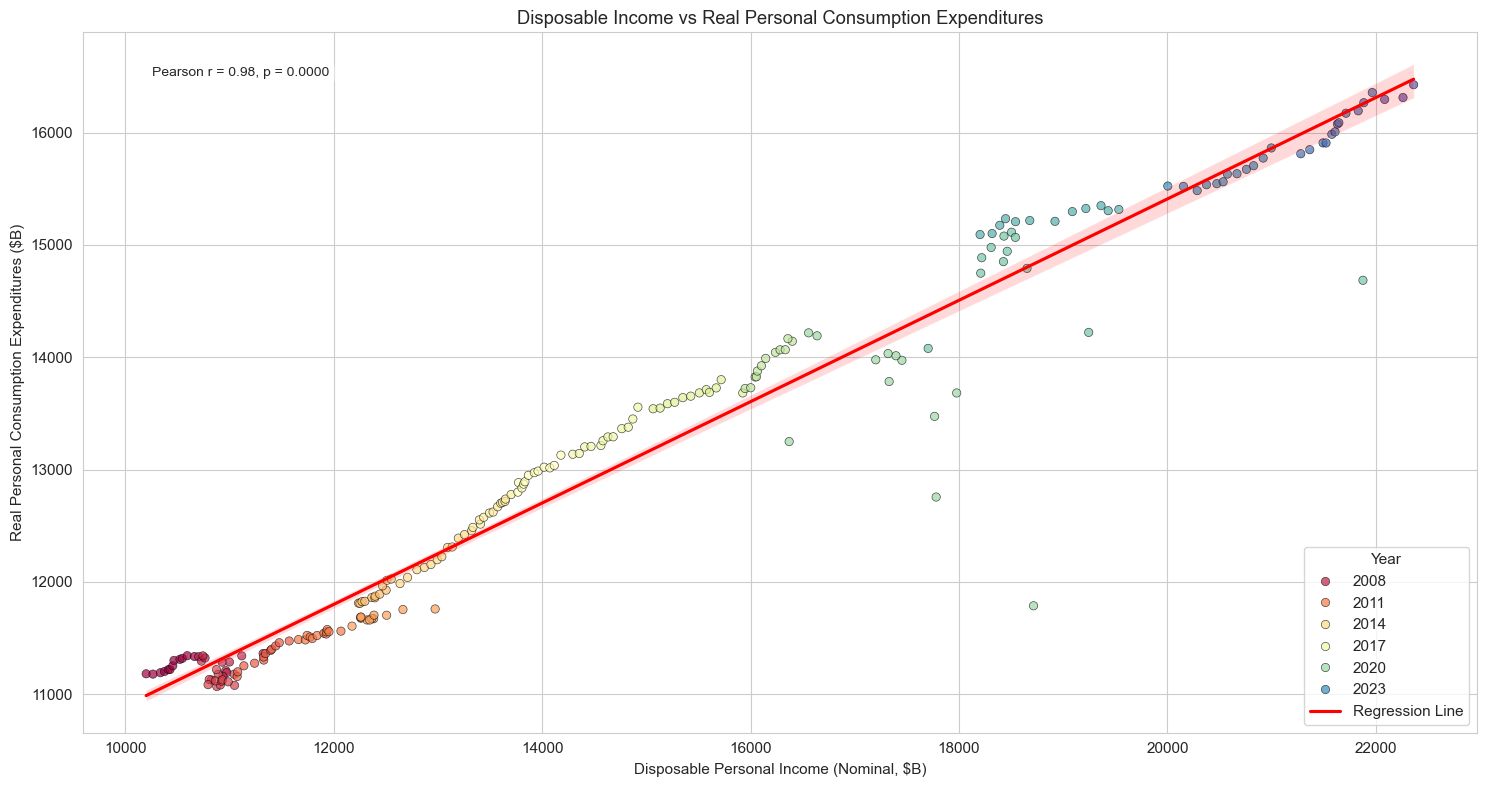

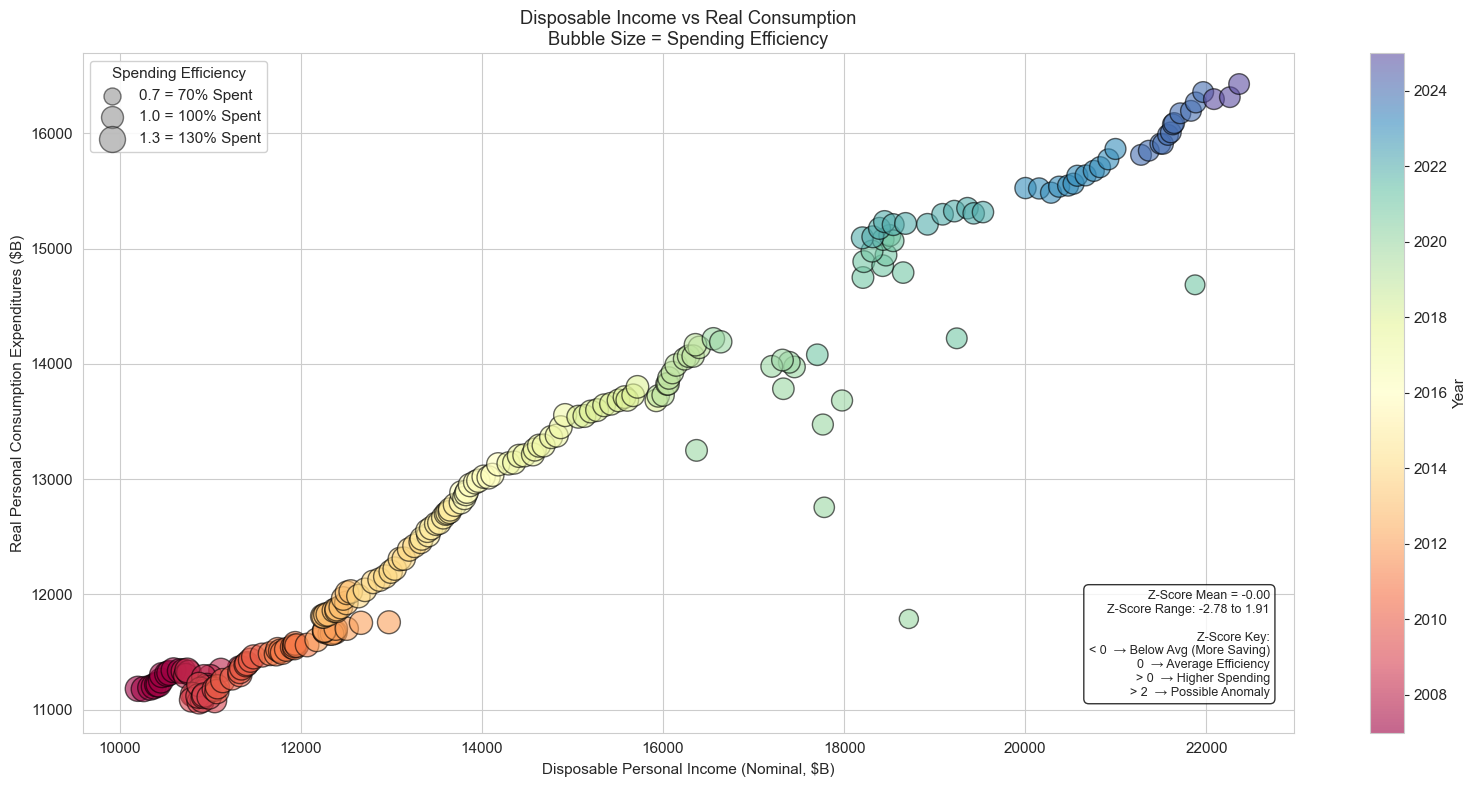

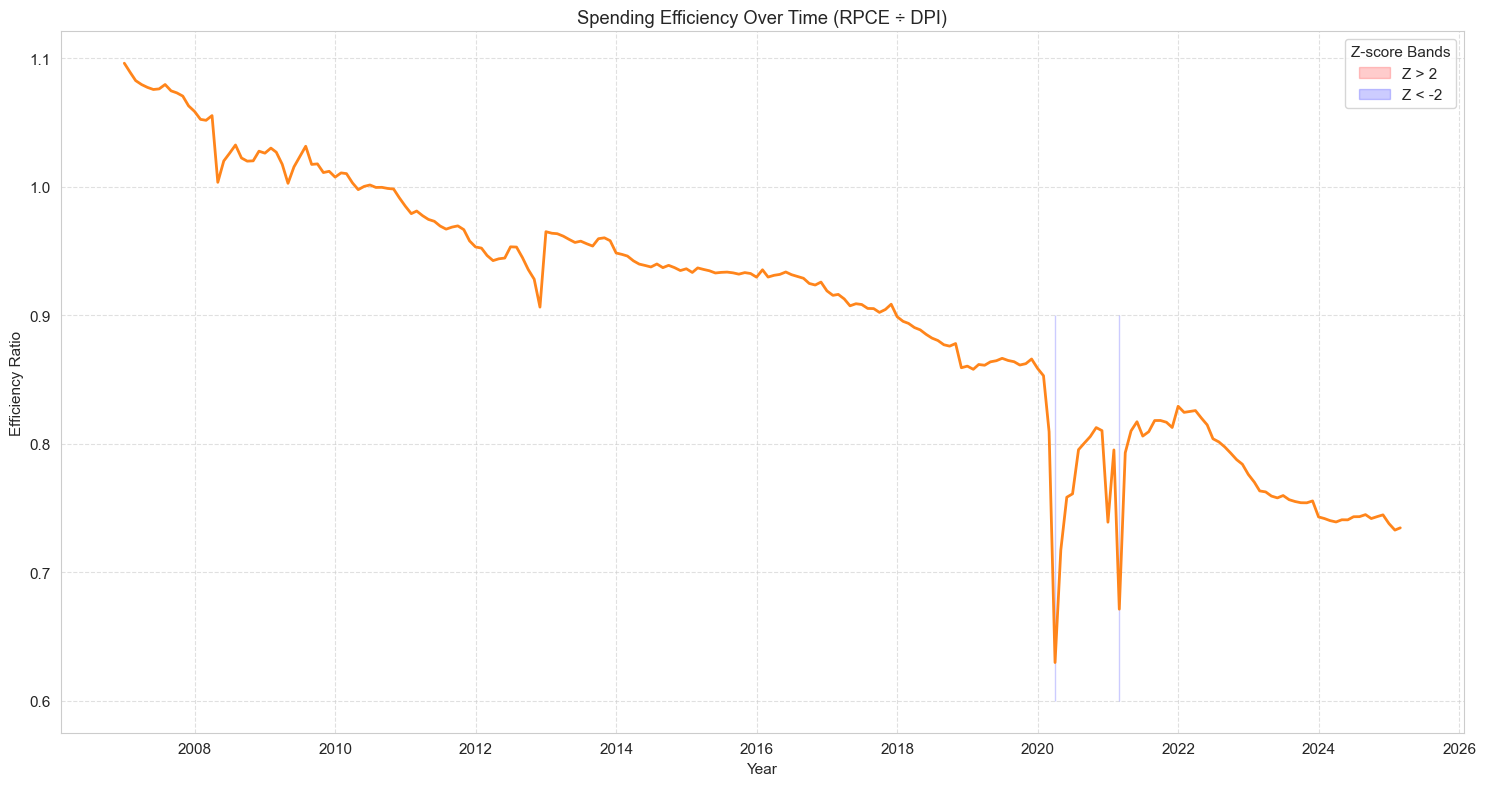

In [99]:
# Chart 3A — Scatter Plot with Regression Line
# Chart Type: Bivariate Scatter + Trendline
# Purpose: Show direct relationship between income and consumption

fig, ax1 = plt.subplots(figsize=(15, 8))
sns.scatterplot(
    data=us_econ,
    x='Disposable_Personal_Income_Nominal',
    y='Real_Personal_Consumption_Expenditures',
    hue='YEAR',
    palette='Spectral',
    edgecolor='black',
    alpha=0.7,
    ax=ax1
)
sns.regplot(
    data=us_econ,
    x='Disposable_Personal_Income_Nominal',
    y='Real_Personal_Consumption_Expenditures',
    scatter=False,
    color='red',
    ax=ax1,
    label='Regression Line'
)
r, p = pearsonr(us_econ['Disposable_Personal_Income_Nominal'], us_econ['Real_Personal_Consumption_Expenditures'])
text = f"Pearson r = {r:.2f}, p = {p:.4f}"
ax1.text(0.05, 0.95, text, transform=ax1.transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.6))
ax1.set_title("Disposable Income vs Real Personal Consumption Expenditures")
ax1.set_xlabel("Disposable Personal Income (Nominal, $B)")
ax1.set_ylabel("Real Personal Consumption Expenditures ($B)")
ax1.legend(title='Year')
ax1.grid(True)
plt.tight_layout()
plt.show()

# Chart 3B — Bubble Plot with Spending Efficiency (Multivariate)
# Chart Type: Bubble Chart
# Purpose: Add Spending Efficiency to the mix

us_econ['Spending_Efficiency'] = us_econ['Real_Personal_Consumption_Expenditures'] / us_econ['Disposable_Personal_Income_Nominal']
us_econ['Bubble_Size'] = us_econ['Spending_Efficiency'] * 300
eff_z = zscore(us_econ['Spending_Efficiency'])

fig, ax2 = plt.subplots(figsize=(16.2, 8))
bubble = ax2.scatter(
    us_econ['Disposable_Personal_Income_Nominal'],
    us_econ['Real_Personal_Consumption_Expenditures'],
    s=us_econ['Bubble_Size'],
    c=us_econ['YEAR'],
    cmap='Spectral',
    alpha=0.6,
    edgecolor='black'
)

cbar = plt.colorbar(bubble, ax=ax2)
cbar.set_label("Year")

# Bubble Size Key
for size, label in zip([150, 250, 350], ['0.7 = 70% Spent', '1.0 = 100% Spent', '1.3 = 130% Spent']):
    ax2.scatter([], [], s=size, color='gray', alpha=0.5, edgecolor='black', label=label)
bubble_legend = ax2.legend(loc='upper left', title='Spending Efficiency', frameon=True)
bubble_legend.get_frame().set_alpha(0.9)

# Z-score annotation
z_text = (
    f"Z-Score Mean = {eff_z.mean():.2f}\n"
    f"Z-Score Range: {eff_z.min():.2f} to {eff_z.max():.2f}\n\n"
    "Z-Score Key:\n"
    "< 0  → Below Avg (More Saving)\n"
    "  0  → Average Efficiency\n"
    "> 0  → Higher Spending\n"
    "> 2  → Possible Anomaly"
)
ax2.text(0.98, 0.05, z_text, transform=ax2.transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="black", alpha=0.8))

ax2.set_title("Disposable Income vs Real Consumption\nBubble Size = Spending Efficiency")
ax2.set_xlabel("Disposable Personal Income (Nominal, $B)")
ax2.set_ylabel("Real Personal Consumption Expenditures ($B)")
ax2.grid(True)
plt.tight_layout()
plt.show()

# Chart 3C — Efficiency Over Time
# Chart Type: Line Plot
# Purpose: Show if Americans are spending more or less of their income over time

fig, ax3 = plt.subplots(figsize=(15, 8))
ax3.plot(us_econ['DATE'], us_econ['Spending_Efficiency'], color='#FF851B', linewidth=2)

# Highlight high/low efficiency bands
ax3.fill_between(us_econ['DATE'], 1.1, 1.4, where=(eff_z > 2), color='red', alpha=0.2, label='Z > 2')
ax3.fill_between(us_econ['DATE'], 0.6, 0.9, where=(eff_z < -2), color='blue', alpha=0.2, label='Z < -2')

ax3.set_title("Spending Efficiency Over Time (RPCE ÷ DPI)")
ax3.set_xlabel("Year")
ax3.set_ylabel("Efficiency Ratio")
ax3.legend(title='Z-score Bands')
ax3.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 📖 Story Chapter: 💥 Climax - Spending Efficiency by Income Tier

## 🔍 Question 4: Do spending habits show seasonal or quarterly patterns?

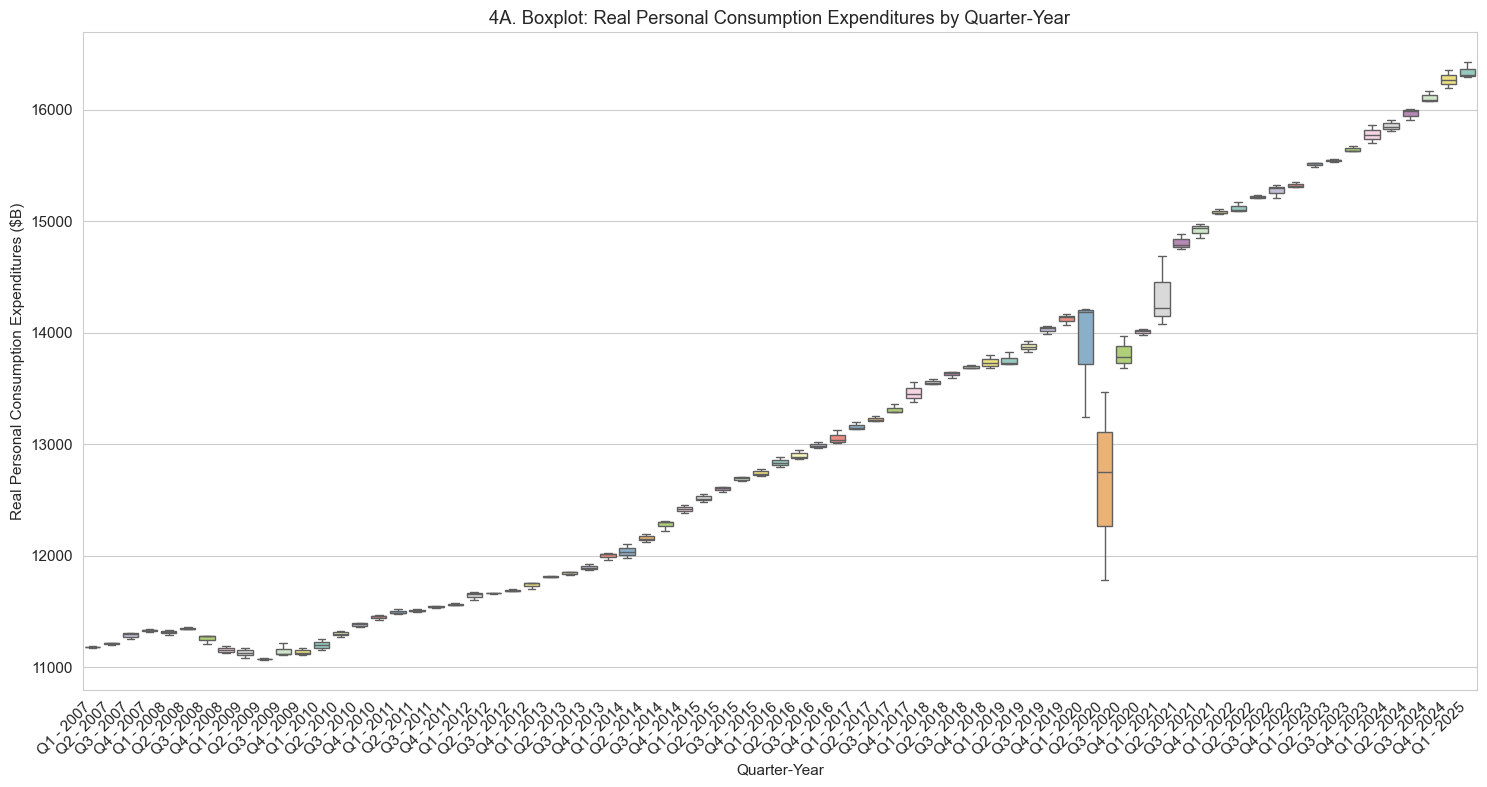

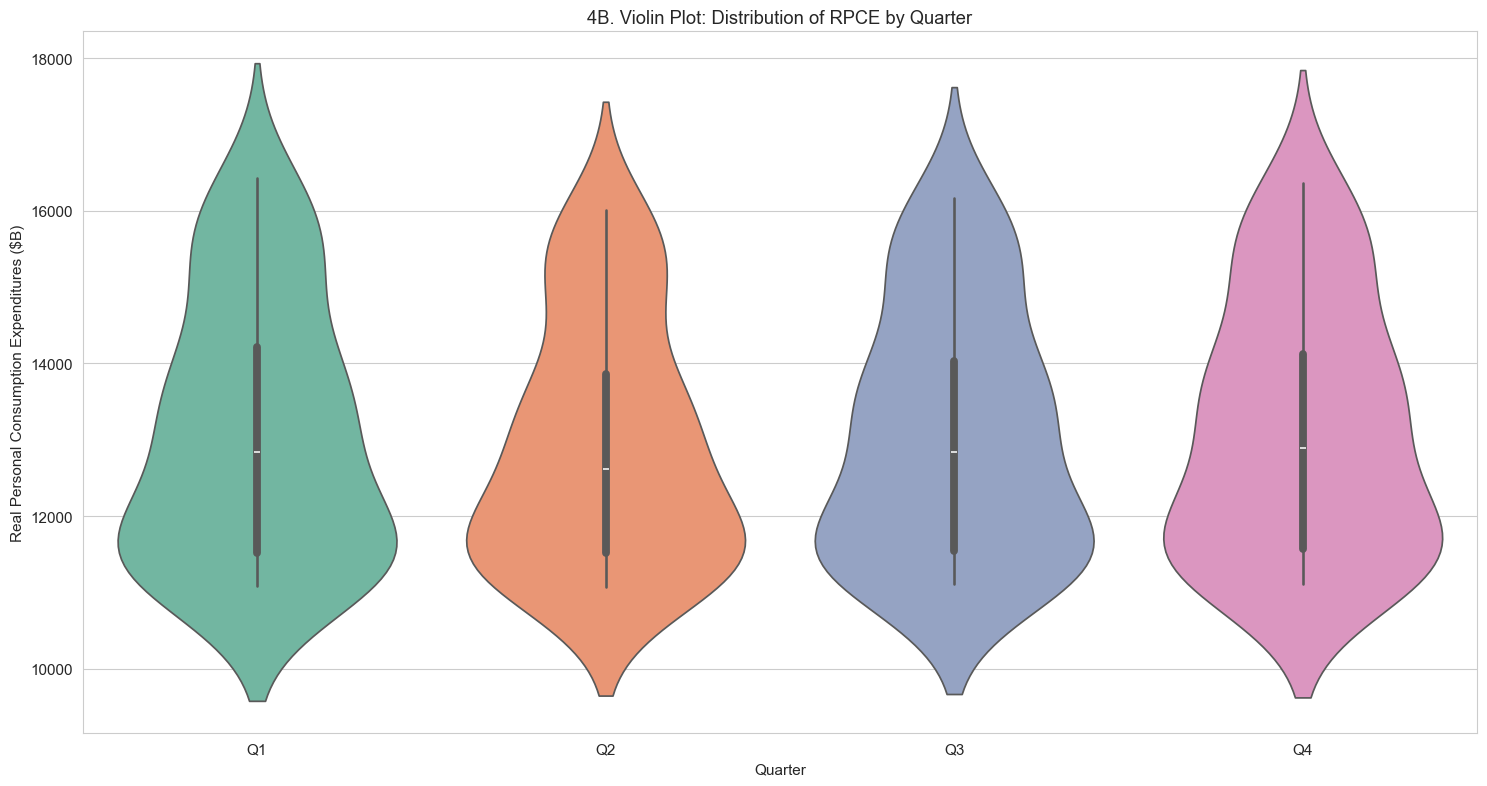

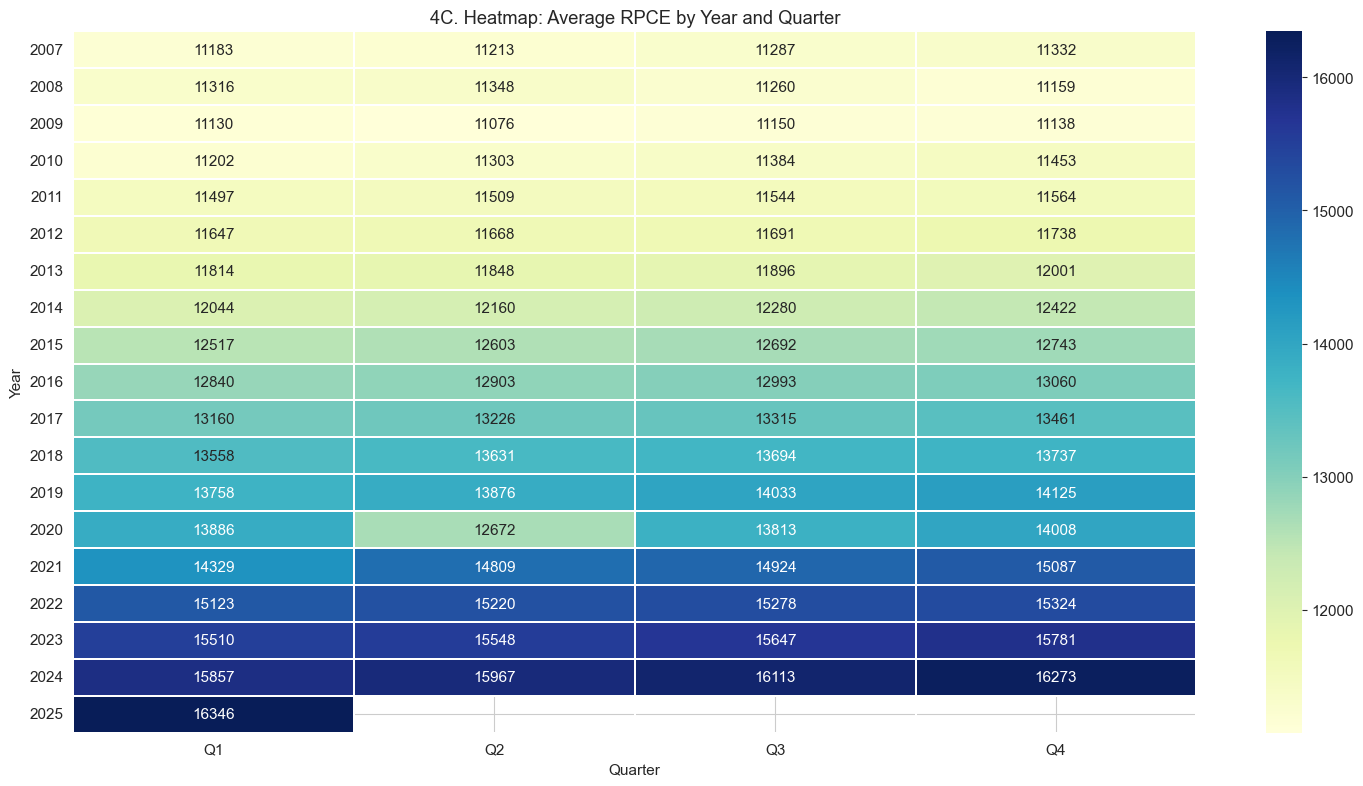

In [102]:
# Create a label to identify quarters by year
us_econ['QUARTER_LABEL'] = us_econ['QUARTER'] + " - " + us_econ['YEAR'].astype(str)

# Chart 4A: Boxplot of RPCE by Quarter-Year
plt.figure(figsize=(15, 8))
sns.boxplot(data=us_econ, x="QUARTER_LABEL", y="Real_Personal_Consumption_Expenditures", palette="Set3")
plt.title("4A. Boxplot: Real Personal Consumption Expenditures by Quarter-Year")
plt.xlabel("Quarter-Year")
plt.ylabel("Real Personal Consumption Expenditures ($B)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Chart 4B: Violin Plot of RPCE by Quarter
plt.figure(figsize=(15, 8))
sns.violinplot(data=us_econ, x="QUARTER", y="Real_Personal_Consumption_Expenditures", palette="Set2")
plt.title("4B. Violin Plot: Distribution of RPCE by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Real Personal Consumption Expenditures ($B)")
plt.tight_layout()
plt.show()

# Chart 4C: Heatmap of Avg RPCE by Year and Quarter
heatmap_data = us_econ.groupby(['YEAR', 'QUARTER'])['Real_Personal_Consumption_Expenditures'].mean().unstack()
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.3)
plt.title("4C. Heatmap: Average RPCE by Year and Quarter")
plt.xlabel("Quarter")
plt.ylabel("Year")
plt.tight_layout()
plt.show()



## ✅ Question 5: How has the ratio of spending to income changed over time?

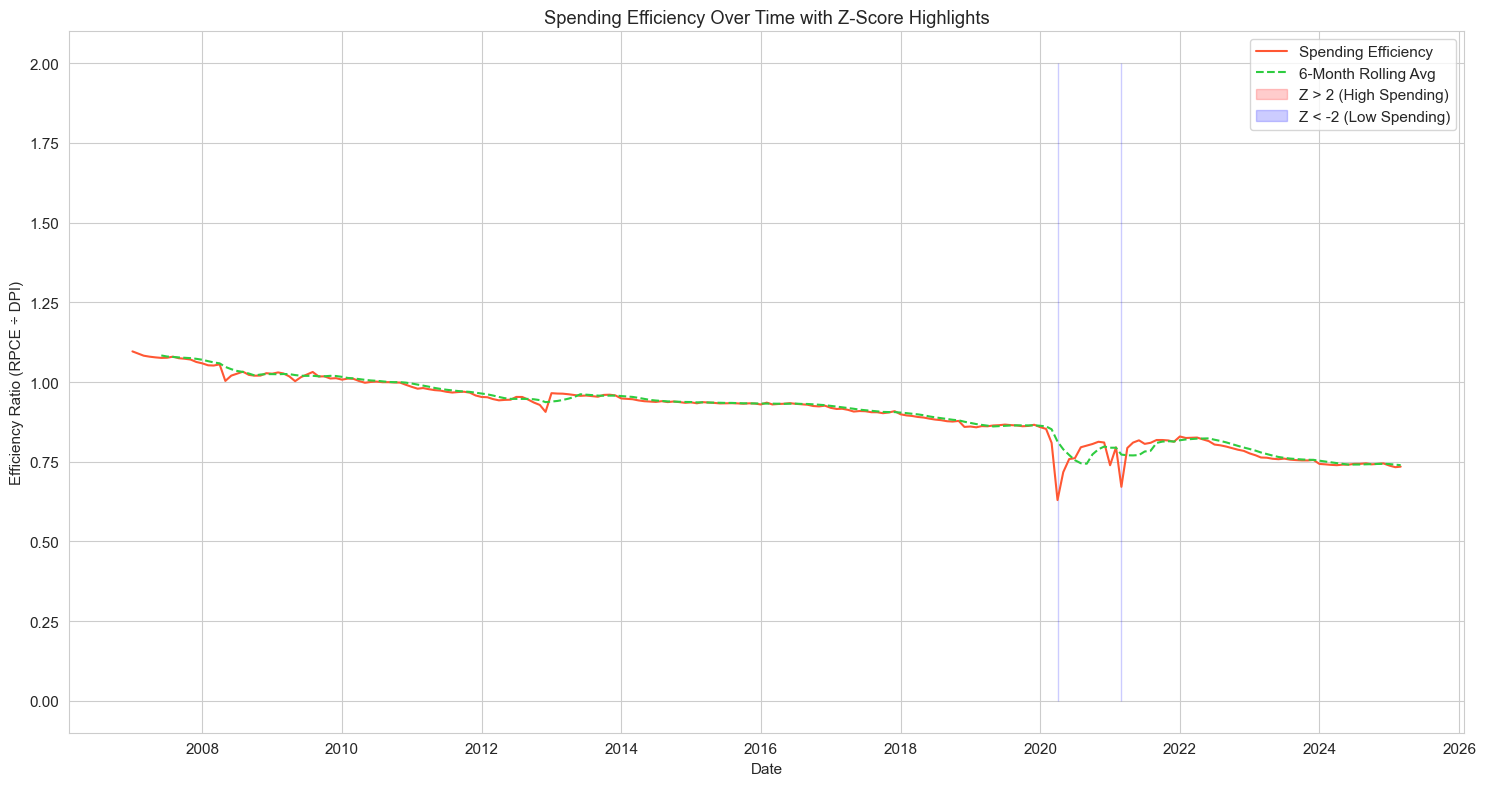

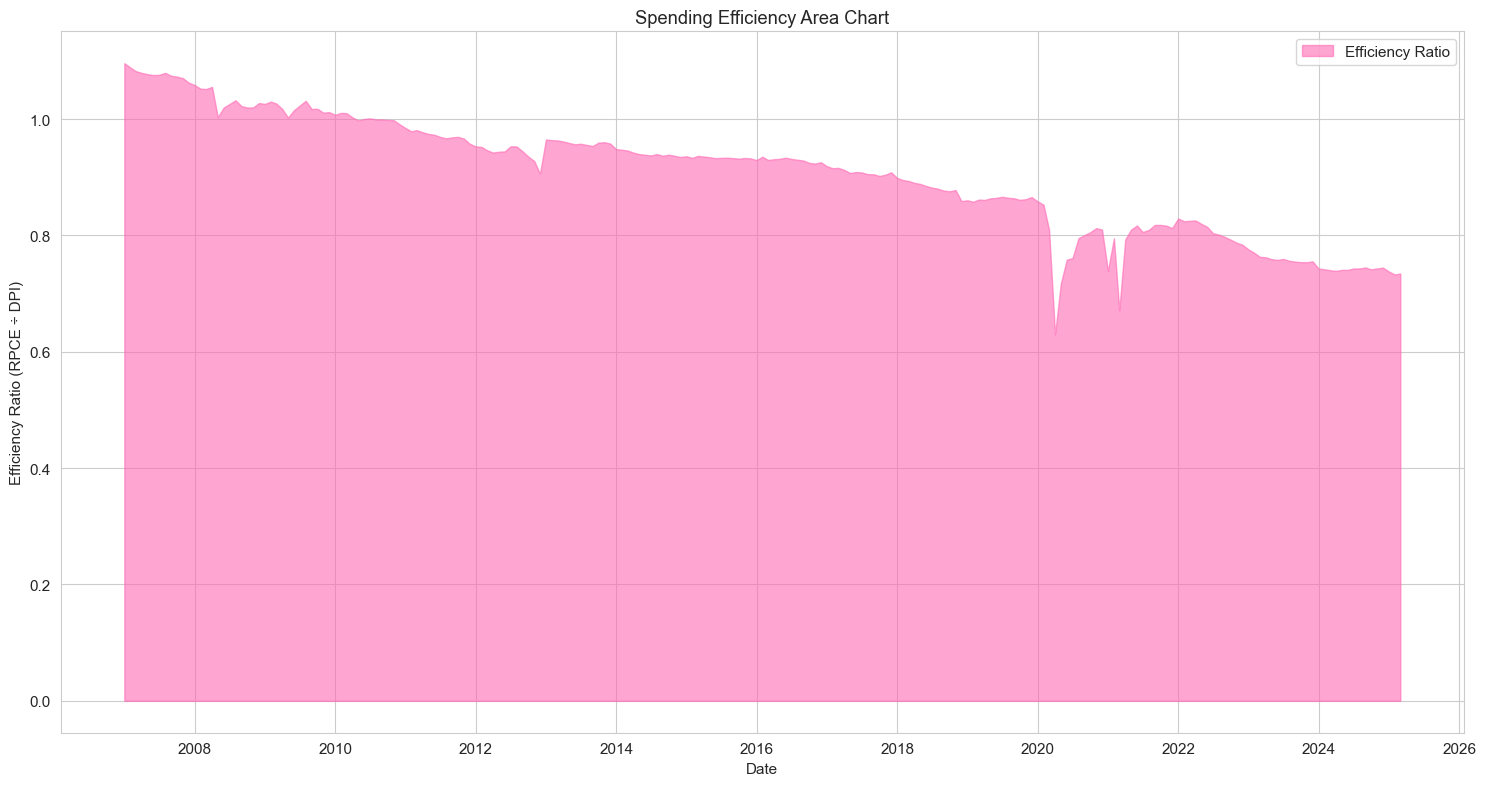

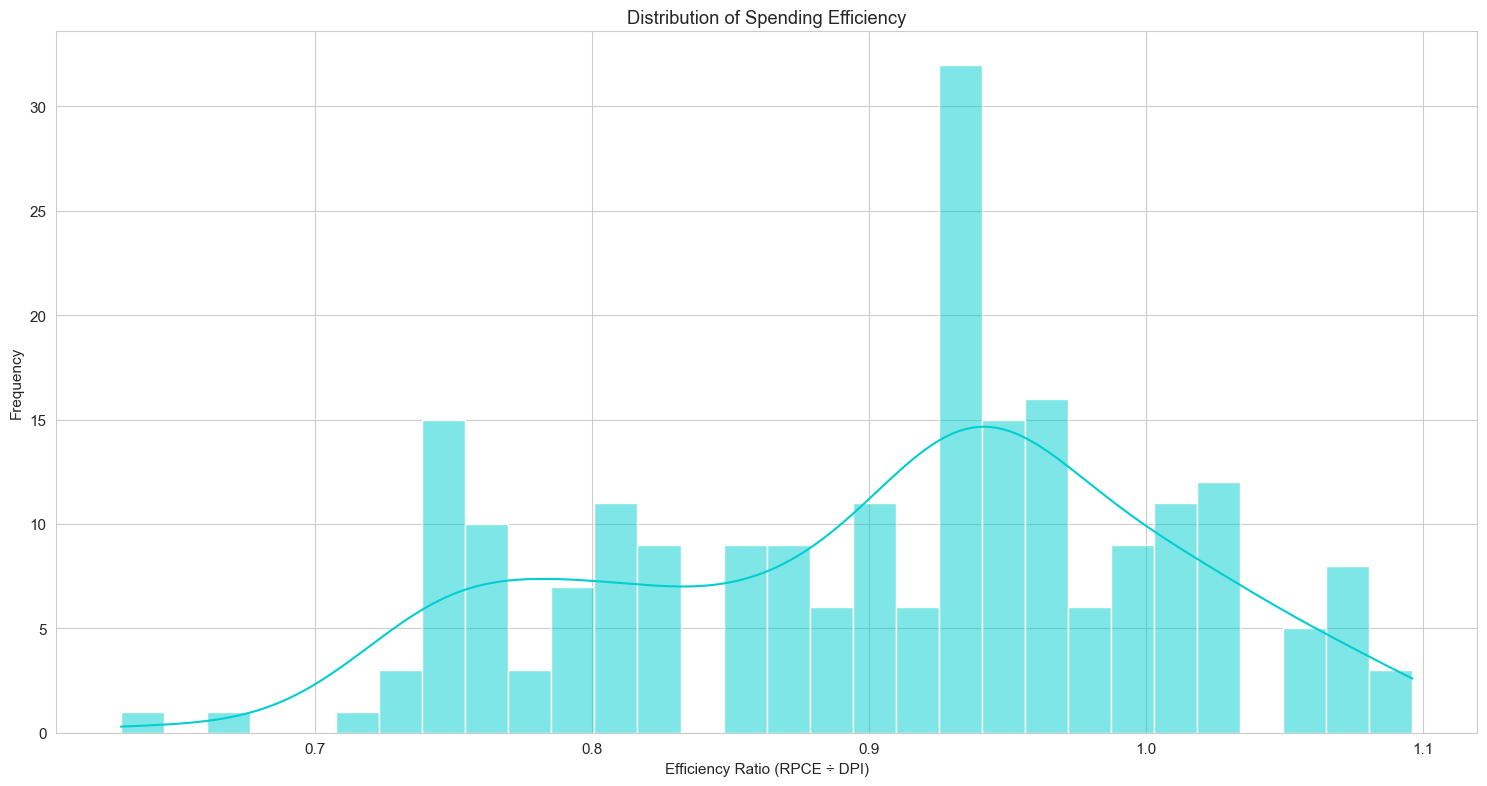

In [101]:
# Calculate and clean metrics
us_econ['Spending_Efficiency'] = pd.to_numeric(
    us_econ['Real_Personal_Consumption_Expenditures'] / us_econ['Disposable_Personal_Income_Nominal'],
    errors='coerce'
)

us_econ_clean = us_econ.dropna(subset=['Spending_Efficiency']).copy()
us_econ_clean['Efficiency_Rolling'] = us_econ_clean['Spending_Efficiency'].rolling(6).mean()
us_econ_clean['Efficiency_Z'] = zscore(us_econ_clean['Spending_Efficiency'])

# Chart 5A – Spending Efficiency with Z-Score Highlights
plt.figure(figsize=(15, 8))
plt.plot(us_econ_clean['DATE'], us_econ_clean['Spending_Efficiency'], label='Spending Efficiency', color='#FF5733')
plt.plot(us_econ_clean['DATE'], us_econ_clean['Efficiency_Rolling'], label='6-Month Rolling Avg', color='#2ECC40', linestyle='--')
plt.fill_between(us_econ_clean['DATE'], 0, 2, where=(us_econ_clean['Efficiency_Z'] > 2), color='red', alpha=0.2, label='Z > 2 (High Spending)')
plt.fill_between(us_econ_clean['DATE'], 0, 2, where=(us_econ_clean['Efficiency_Z'] < -2), color='blue', alpha=0.2, label='Z < -2 (Low Spending)')
plt.title('Spending Efficiency Over Time with Z-Score Highlights')
plt.xlabel('Date')
plt.ylabel('Efficiency Ratio (RPCE ÷ DPI)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Chart 5B – Area Chart
plt.figure(figsize=(15, 8))
plt.fill_between(us_econ_clean['DATE'], us_econ_clean['Spending_Efficiency'], color='#FF69B4', alpha=0.6, label='Efficiency Ratio')
plt.title('Spending Efficiency Area Chart')
plt.xlabel('Date')
plt.ylabel('Efficiency Ratio (RPCE ÷ DPI)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Chart 5C – Histogram of Efficiency Ratios
plt.figure(figsize=(15, 8))
sns.histplot(us_econ_clean['Spending_Efficiency'], bins=30, kde=True, color='#00CED1')
plt.title('Distribution of Spending Efficiency')
plt.xlabel('Efficiency Ratio (RPCE ÷ DPI)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


## 📖 Story Chapter: 🎯 Conclusion - Final Annotated Summary

## ✅ Question 6: Did consumption collapse or persist during major recessions?

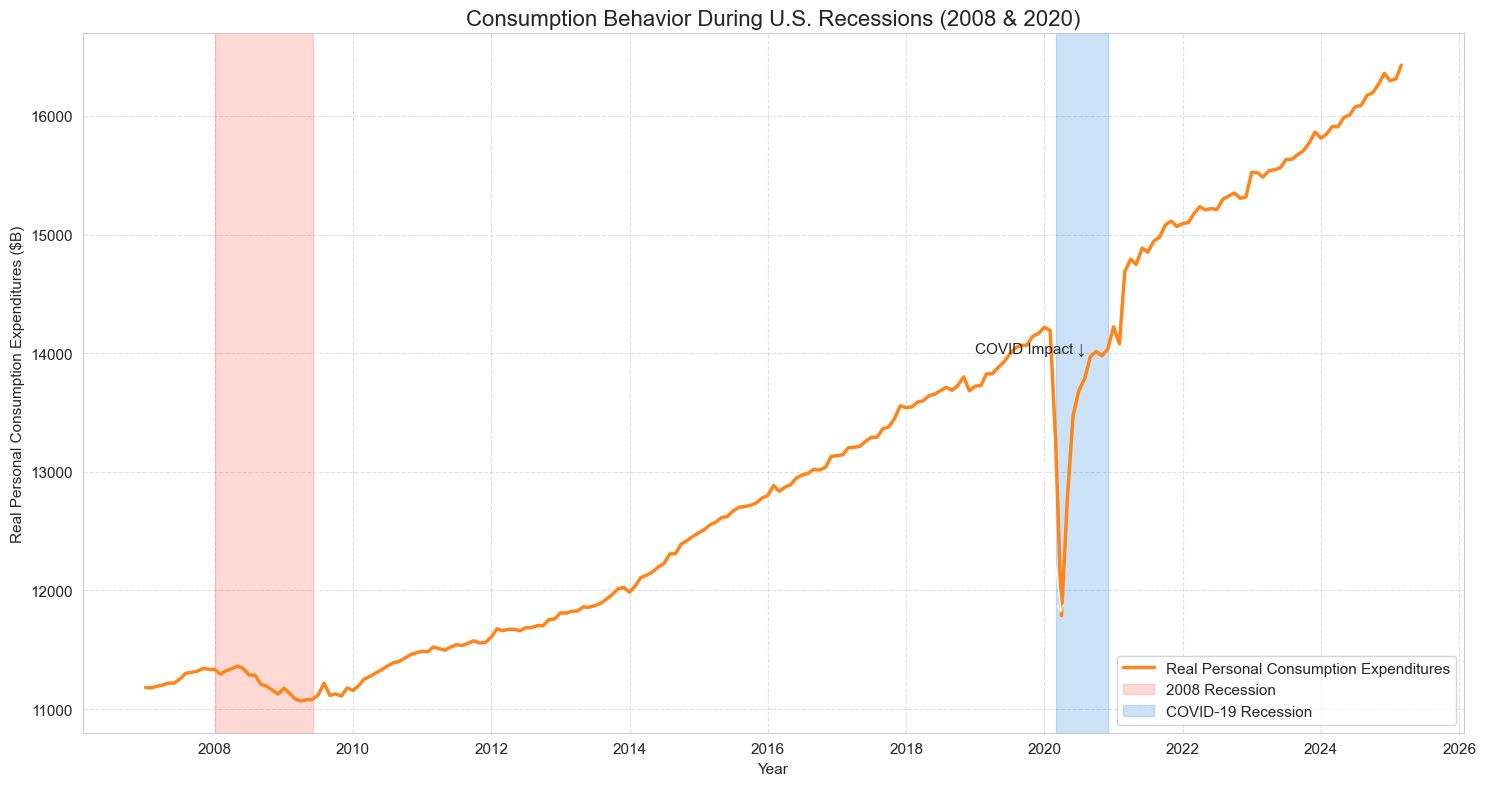

In [ ]:
# Trends During Recessions 
plt.figure(figsize=(15, 8))
plt.plot(
    us_econ['DATE'],
    us_econ['Real_Personal_Consumption_Expenditures'],
    color='#FF851B',
    linewidth=2.5,
    label='Real Personal Consumption Expenditures'
)

# Highlight Recessions
plt.axvspan(pd.to_datetime("2008-01-01"), pd.to_datetime("2009-06-01"),
            color='#FF4136', alpha=0.2, label='2008 Recession')
plt.axvspan(pd.to_datetime("2020-03-01"), pd.to_datetime("2020-12-01"),
            color='#0074D9', alpha=0.2, label='COVID-19 Recession')

# COVID Annotation
plt.annotate("COVID Impact ↓",
             xy=(pd.to_datetime("2020-04-01"), us_econ.loc[us_econ['DATE'] == "2020-04-01", 'Real_Personal_Consumption_Expenditures'].values[0]),
             xytext=(pd.to_datetime("2019-01-01"), 14000),
             arrowprops=dict(facecolor='cyan', arrowstyle='->'),
             fontsize=11)

plt.title("Consumption Behavior During U.S. Recessions (2008 & 2020)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Real Personal Consumption Expenditures ($B)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



## ✅ Question 7: What does this tell us about U.S. economic behavior and resilience?

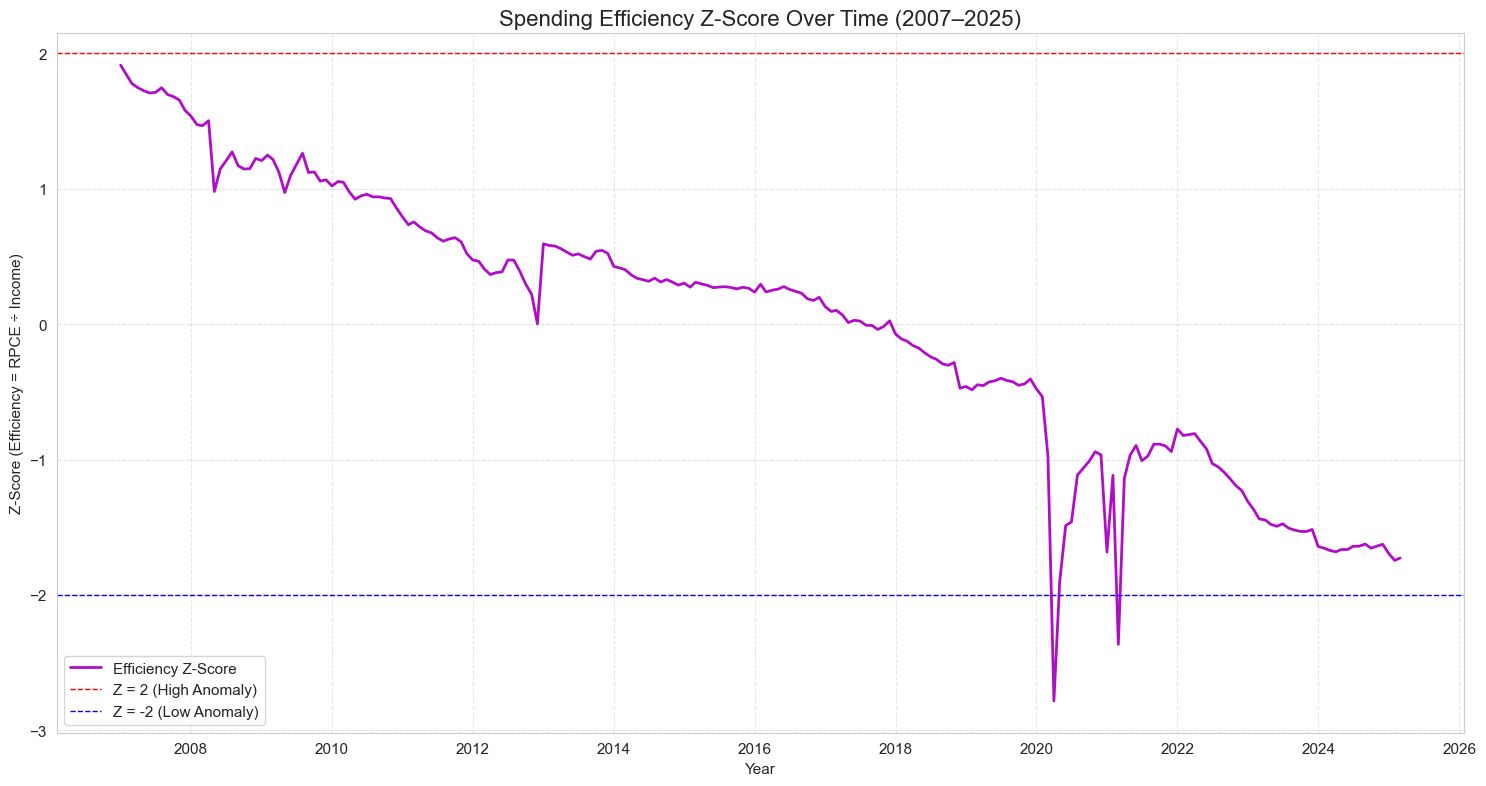

In [ ]:
# Calculate Z-Score of Spending Efficiency
us_econ['Efficiency_Z'] = zscore(us_econ['Spending_Efficiency'])

plt.figure(figsize=(15, 8))
plt.plot(us_econ['DATE'], us_econ['Efficiency_Z'],
         color='#B10DC9', linewidth=2, label='Efficiency Z-Score')

# Highlight ±2 Std Dev
plt.axhline(2, color='red', linestyle='--', linewidth=1, label='Z = 2 (High Anomaly)')
plt.axhline(-2, color='blue', linestyle='--', linewidth=1, label='Z = -2 (Low Anomaly)')

plt.title("Spending Efficiency Z-Score Over Time (2007–2025)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Z-Score (Efficiency = RPCE ÷ Income)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 🎯 Conclusion - SUMMARY IN ANALYSIS - Real Personal Consumption Expenditures Resilience Through Economic Shocks 🧠 

Summary of U.S. Real Personal Consumption Trends (2007–2025):
- According to my EDA, from 2007 to 2025, American consumer behavior has shown a combination of steady growth, short-term shocks, and seasonal variation. Using time series plots, distribution analyses, efficiency ratios, and seasonal breakdowns, we observe clear macro patterns and meaningful deviations.

Steady Growth with Disruption:
- Real Personal Consumption Expenditures (RPCE) rose consistently over the period, though significant dips occurred during the 2008 financial crisis and the "COVID-19" pandemic. These disruptions were temporary, with recoveries forming clear V-shaped rebounds.

Income vs. Spending – A Strong but Imperfect Correlation:
- There is a strong statistical correlation between income and spending (Pearson r > 0.9), but some years—especially during stimulus programs—showed higher-than-normal spending relative to income. These anomalies were captured using Z-scores and Spending Efficiency (RPCE ÷ DPI).

Seasonal and Quarterly Patterns:
- Spending behavior reflects cyclical trends. Q4 consistently shows higher expenditures, likely due to holiday-related spending, while Q1 shows recurring declines. These seasonal patterns are visible in boxplots, violin plots, and heatmaps.

Efficiency Patterns Over Time:
- While most Americans spend roughly what they earn (efficiency ratio ≈ 1), some periods reflect spikes or drops in efficiency. These variations often coincide with economic shocks or government intervention.

Resilience in Economic Crises:
- Annotated time series highlight consumer adaptability. Although spending dipped sharply during crises, recoveries followed swiftly, suggesting a strong return to baseline behavior once external pressures eased.

Conclusion & Recommendation:
- The data suggests that U.S. consumers are resilient, largely consistent in their spending habits, and responsive to both economic downturns and recovery incentives. Patterns of seasonality and consumption efficiency support this narrative.
- For individuals or investors considering migration or economic activity in the U.S., this landscape reflects a stable and responsive consumer economy — one that rebounds from adversity and maintains long-term upward momentum in real spending.